In [167]:
# Multiclass Classification

import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

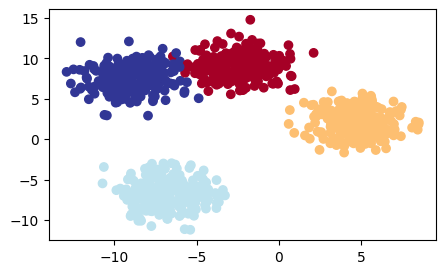

In [168]:
# Preparing data
x_blob, y_blob = make_blobs(n_samples=1000,n_features=NUM_FEATURES,centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(x_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(5,3))
plt.scatter(x_blob[:,0],x_blob[:,1], c = y_blob, cmap=plt.cm.RdYlBu)

In [169]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [170]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        super().__init__()

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.linear_layer_stack(x)

In [171]:
modelv0 = BlobModel(input_features=2, output_features=4).to(device)

modelv0

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [172]:
modelv0.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.1438,  0.4054],
                      [-0.6340,  0.4586],
                      [-0.3689, -0.6704],
                      [ 0.5135,  0.6274],
                      [-0.2751,  0.0767],
                      [ 0.1533, -0.3826],
                      [-0.5118,  0.3652],
                      [ 0.0238, -0.3563]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.3763, -0.4668, -0.6482, -0.6805,  0.4158,  0.4080,  0.6407,  0.0133])),
             ('linear_layer_stack.1.weight',
              tensor([[-0.1107, -0.1552,  0.1401,  0.2689,  0.0584,  0.1806,  0.3299,  0.2219],
                      [-0.1217, -0.0877, -0.0638,  0.3528, -0.2140, -0.2854,  0.2101, -0.2619],
                      [ 0.2347, -0.1955, -0.2368,  0.1534, -0.0526,  0.3177,  0.1294,  0.2033],
                      [-0.0671,  0.2049, -0.0581, -0.2070,  0.2956,  0.0937, -0.0376,  0.2156],
                      [ 0.1310,  0.0693,  0.249

In [173]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=modelv0.parameters(), lr = 0.01)

In [174]:
modelv0.eval()
with torch.inference_mode():
    test_logits = modelv0(X_test.to(device))
    pred_probs = torch.softmax(test_logits, dim = 1)


In [175]:
pred_probs[:5]

tensor([[0.7205, 0.0996, 0.0660, 0.1139],
        [0.2866, 0.2395, 0.2082, 0.2658],
        [0.0123, 0.5205, 0.2822, 0.1850],
        [0.4804, 0.2101, 0.1278, 0.1817],
        [0.8058, 0.0555, 0.0471, 0.0916]])

In [176]:
test_preds = torch.argmax(pred_probs, dim=1)
test_preds[:5]

tensor([0, 0, 1, 0, 0])

In [177]:
# Writing a training and testing loop